In [1]:
# Importing
import theano.tensor as T
import theano
import sys, os
sys.path.append("../GeMpy")

# Importing GeMpy modules
import GeMpy

# Reloading (only for development purposes)
import importlib
importlib.reload(GeMpy)

# Usuful packages
import numpy as np
import pandas as pn

import matplotlib.pyplot as plt

# This was to choose the gpu
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Default options of printin
np.set_printoptions(precision = 6, linewidth= 130, suppress =  True)

#%matplotlib inline
%matplotlib inline

# Importing the data from csv files and settign extent and resolution
geo_data = GeMpy.import_data([696000,747000,6863000,6950000,-20000, 2000],[ 50, 50, 50],
                         path_f = "./GeoModeller/sandstonesimple_Foliations.csv",
                         path_i = "./GeoModeller/sandstonesimple_Points.csv")

# Assigning series to formations as well as their order (timewise)
GeMpy.set_data_series(geo_data, {"EarlyGranite_Series":geo_data.formations[-1], 
                      "BIF_Series":(geo_data.formations[2], geo_data.formations[0]),
                      "SimpleMafic_Series":geo_data.formations[1]}, 
                       order_series = ["EarlyGranite_Series",
                                       "BIF_Series",
                                       "SimpleMafic_Series"], verbose=0)

In [2]:
geo_data.formations

array(['SimpleBIF', 'SimpleMafic1', 'SimpleMafic2', 'EarlyGranite'], dtype=object)

In [3]:
data_interp = GeMpy.set_interpolator(geo_data,
                                     dtype="float32",
                                      u_grade=[1, 1, 1],
                                     range_var = 110000/97123,
                                     verbose=[])

# This cell will go to the backend

# Set all the theano shared parameters and return the symbolic variables (the input of the theano function)
input_data_T = data_interp.interpolator.tg.input_parameters_list()

# Prepare the input data (interfaces, foliations data) to call the theano function.
#Also set a few theano shared variables with the len of formations series and so on
input_data_P = data_interp.interpolator.data_prep(u_grade=[3, 3, 3]) 

# Compile the theano function.
debugging = theano.function(input_data_T, data_interp.interpolator.tg.whole_block_model(), on_unused_input='ignore',
                            allow_input_downcast=True, profile=True)

In [4]:
sol_GP = debugging(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3],input_data_P[4], input_data_P[5])

In [5]:
geo_res = pn.read_csv('./GeoModeller/sandstonesimple_sol.vox')
geo_res = geo_res.iloc[9:]
ip_addresses = geo_data.interfaces["formation"].unique()
ip_dict = dict(zip(ip_addresses, range(1, len(ip_addresses) + 1)))
ip_dict['Murchison'] = 0
ip_dict['out'] = 0
ip_dict['SimpleMafic'] = 4
geo_res_num = geo_res['nx 50'].replace(ip_dict)


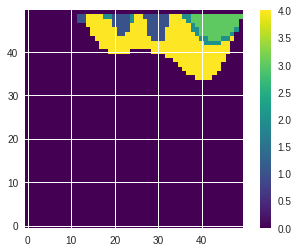

In [18]:
plt.imshow( geo_res_num.as_matrix().reshape(50, 50, 50)[:,11, :],  origin="bottom", cmap="viridis" )
plt.colorbar()

In [7]:
g = geo_res_num.as_matrix().reshape(50,50,50).swapaxes(0,2)

In [8]:
np.unique(g)

array([0, 1, 2, 3, 4])

In [9]:
sol = np.ravel(g)
lith0 = sol == 0
lith1 = sol == 1
lith2 = sol == 2
lith3 = sol == 3
lith4 = sol == 4
np.unique(sol)

import ipyvolume.pylab as p3

p3.figure(width=800)

p3.scatter(geo_data.grid.grid[:,0][lith0],
           geo_data.grid.grid[:,1][lith0],
           geo_data.grid.grid[:,2][lith0], marker='box', color = 'blue', size = 0.1 )

p3.scatter(geo_data.grid.grid[:,0][lith1],
           geo_data.grid.grid[:,1][lith1],
           geo_data.grid.grid[:,2][lith1], marker='box', color = 'yellow', size = 1 )

p3.scatter(geo_data.grid.grid[:,0][lith2],
           geo_data.grid.grid[:,1][lith2],
           geo_data.grid.grid[:,2][lith2], marker='box', color = 'green', size = 1 )

p3.scatter(geo_data.grid.grid[:,0][lith3],
           geo_data.grid.grid[:,1][lith3],
           geo_data.grid.grid[:,2][lith3], marker='box', color = 'pink', size = 1 )

p3.scatter(geo_data.grid.grid[:,0][lith4],
          geo_data.grid.grid[:,1][lith4],
          geo_data.grid.grid[:,2][lith4], marker='box', color = 'red', size = 1 )

p3.xlim(np.min(geo_data.grid.grid[:,0]),np.min(geo_data.grid.grid[:,0])+2175.0*40)
p3.ylim(np.min(geo_data.grid.grid[:,1]),np.max(geo_data.grid.grid[:,1]))
p3.zlim(np.min(geo_data.grid.grid[:,2]),np.min(geo_data.grid.grid[:,2])+2175.0*40)#np.max(geo_data.grid.grid[:,2]))

p3.show()

In [10]:
np.unique(sol_GP[-1,0,:])

array([ 0.,  1.,  2.,  3.,  4.])

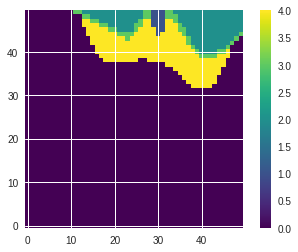

In [16]:
plt.imshow( sol_GP[-1,0,:].reshape(50, 50, 50)[:, 12, :].T,  origin="bottom", cmap="viridis" )
plt.colorbar()

In [12]:
# So far this is a simple 3D visualization. I have to adapt it into GeMpy 
sol = sol_GP[-1, 0 , :]
lith0 = sol == 0
lith1 = sol == 1
lith2 = sol == 2
lith3 = sol == 3
#lith4 = sol == 4
np.unique(sol)

import ipyvolume.pylab as p3

p3.figure(width=800)

p3.scatter(geo_data.grid.grid[:,0][lith0],
           geo_data.grid.grid[:,1][lith0],
           geo_data.grid.grid[:,2][lith0], marker='box', color = 'blue', size = 0.1 )

p3.scatter(geo_data.grid.grid[:,0][lith1],
           geo_data.grid.grid[:,1][lith1],
           geo_data.grid.grid[:,2][lith1], marker='box', color = 'yellow', size = 1 )

p3.scatter(geo_data.grid.grid[:,0][lith2],
           geo_data.grid.grid[:,1][lith2],
           geo_data.grid.grid[:,2][lith2], marker='box', color = 'green', size = 1 )

p3.scatter(geo_data.grid.grid[:,0][lith3],
           geo_data.grid.grid[:,1][lith3],
           geo_data.grid.grid[:,2][lith3], marker='box', color = 'pink', size = 1 )

p3.scatter(geo_data.grid.grid[:,0][lith4],
          geo_data.grid.grid[:,1][lith4],
          geo_data.grid.grid[:,2][lith4], marker='box', color = 'red', size = 1 )

p3.xlim(np.min(geo_data.grid.grid[:,0]),np.min(geo_data.grid.grid[:,0])+2175.0*40)
p3.ylim(np.min(geo_data.grid.grid[:,1]),np.max(geo_data.grid.grid[:,1]))
p3.zlim(np.min(geo_data.grid.grid[:,2]),np.min(geo_data.grid.grid[:,2])+2175.0*40)#np.max(geo_data.grid.grid[:,2]))

p3.show()

In [13]:
sol[-1,0,:].reshape(50, 50, 50)[:, 10, :].T

IndexError: too many indices for array

In [14]:
data_interp.interpolator.tg.u_grade_T.get_value(), data_interp.interpolator.tg.a_T.get_value()

(array([3, 3, 3]), array(1.1325844526290894, dtype=float32))

In [ ]:
max_coord = pn.concat(
        [geo_data.foliations, geo_data.interfaces]).max()[['X', 'Y', 'Z']]
min_coord = pn.concat(
    [geo_data.foliations, geo_data.interfaces]).min()[['X', 'Y', 'Z']]


rescaling_factor = 2*np.max(max_coord - min_coord)
rescaling_factor * 1.0627577304840088

In [ ]:
11*97123.0

In [60]:
110000/rescaling_factor

1.1325844547635473

In [59]:
rescaling_factor

97123.0

In [39]:
# Formation number and formation
data_interp.interfaces.groupby('formation number').formation.unique()

formation number
1    [EarlyGranite]
2       [SimpleBIF]
3    [SimpleMafic2]
4    [SimpleMafic1]
Name: formation, dtype: object

In [ ]:
data_interp.formations

In [43]:
ip_dict

{'EarlyGranite': 1,
 'Murchison': 0,
 'SimpleBIF': 2,
 'SimpleMafic': 4,
 'SimpleMafic1': 4,
 'SimpleMafic2': 3,
 'out': 0}